In [6]:
import pandas as pd
# Nécessite l'installation : pip install pandas-datareader
import pandas_datareader.data as web
import datetime

# --- Définition des paramètres de l'API de la Banque Mondiale ---
# NY.GDP.MKTP.KD.ZG = Taux de croissance du PIB (annuel %)
indicator_code = 'NY.GDP.MKTP.KD.ZG'

# Codes des pays (Banque Mondiale)
countries = ['MAR', 'EU'] # MAR = Maroc, EU = Zone Euro

# Période
start_year = 1990
end_year = datetime.date.today().year

print(f"Extraction des taux de croissance du PIB pour {countries} de {start_year} à {end_year}...")

# --- 3. Extraction des données (via l'API de la Banque Mondiale) ---
try:
    # Utilisation du WorldBankReader direct de pandas_datareader.wb
    from pandas_datareader import wb
    df_gdp = wb.WorldBankReader(symbols=indicator_code, countries=countries, start=start_year, end=end_year).read()

    print("\n✅ Données téléchargées avec succès.")

    # Nettoyage et préparation du DataFrame
    # df_gdp initially has a MultiIndex (country, year) and a single column named by indicator_code

    # 1. Reset the index to turn 'country' and 'year' into regular columns
    df_gdp = df_gdp.reset_index()

    # 2. Pivot the DataFrame to have 'year' as index, 'country' codes as columns, and indicator values
    df_gdp_pivoted = df_gdp.pivot(index='year', columns='country', values=indicator_code)

    # 3. Clean up column names
    df_gdp_pivoted.columns.name = None # Remove the 'country' name from the columns index

    # Rename columns to desired French names, ensuring correct mapping
    new_column_names = {
        'MAR': 'Taux_Croissance_PIB_Maroc',
        'EU': 'Taux_Croissance_PIB_UE'
    }
    df_gdp = df_gdp_pivoted.rename(columns=new_column_names)

    # Reorder columns explicitly based on the desired output if needed
    # df_gdp = df_gdp[['Taux_Croissance_PIB_Maroc', 'Taux_Croissance_PIB_UE']]

    # 4. Set 'Année' as the index name
    df_gdp.index.name = 'Année'

    # Drop rows with any NaN values that might remain (e.g., if some years are missing for a country)
    df_gdp = df_gdp.dropna()

    # Sauvegarde de la Base de Données au format CSV
    file_name = "croissance_pib_maroc_zoneeuro.csv"
    df_gdp.to_csv(file_name)

    # Affichage de la base de données (l'aperçu)
    print("\n--- Aperçu de la Base de Données (df_gdp) ---")
    print(df_gdp.tail(10)) # Affichage des 10 dernières années

    print(f"\n✨ Le fichier {file_name} a été créé localement.")

except Exception as e:
    print(f"\n❌ Une erreur s'est produite lors du téléchargement : {e}")
    print("Assurez-vous d'avoir installé 'pandas_datareader' (pip install pandas-datareader).")

Extraction des taux de croissance du PIB pour ['MAR', 'EU'] de 1990 à 2025...

✅ Données téléchargées avec succès.


/usr/local/lib/python3.12/dist-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EU
  warnings.warn(
/tmp/ipython-input-1122947121.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_gdp = wb.WorldBankReader(symbols=indicator_code, countries=countries, start=start_year, end=end_year).read()



--- Aperçu de la Base de Données (df_gdp) ---
       European Union   Morocco
Année                          
2015         2.370480  4.344583
2016         1.946116  0.521186
2017         2.794143  5.057898
2018         2.054041  3.065641
2019         1.877159  2.890975
2020        -5.573433 -7.178207
2021         6.357136  8.154739
2022         3.492144  1.527204
2023         0.455502  3.403341
2024         1.025368  3.236514

✨ Le fichier croissance_pib_maroc_zoneeuro.csv a été créé localement.


In [7]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df_gdp_loaded = pd.read_csv('croissance_pib_maroc_zoneeuro.csv', index_col='Année')

print("### First 5 rows of the DataFrame:\n")
print(df_gdp_loaded.head())

print("\n### Data types of the columns:\n")
print(df_gdp_loaded.info())

### First 5 rows of the DataFrame:

       European Union    Morocco
Année                           
1990         3.297187   3.411812
1991         1.459843   7.216088
1992         0.901671  -2.097739
1993        -0.596011  -0.740592
1994         2.701638  10.588000

### Data types of the columns:

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1990 to 2024
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   European Union  35 non-null     float64
 1   Morocco         35 non-null     float64
dtypes: float64(2)
memory usage: 840.0 bytes
None


## Visualize GDP Growth Trends

### Subtask:
Generate line plots to visualize the annual GDP growth trends for Morocco and the European Union over time. Ensure the plots are clearly labeled with legends and appropriate titles.


**Reasoning**:
I need to generate line plots to visualize the annual GDP growth trends for Morocco and the European Union. This involves using matplotlib to plot the data from 'df_gdp_loaded', setting appropriate labels, a title, and a legend.



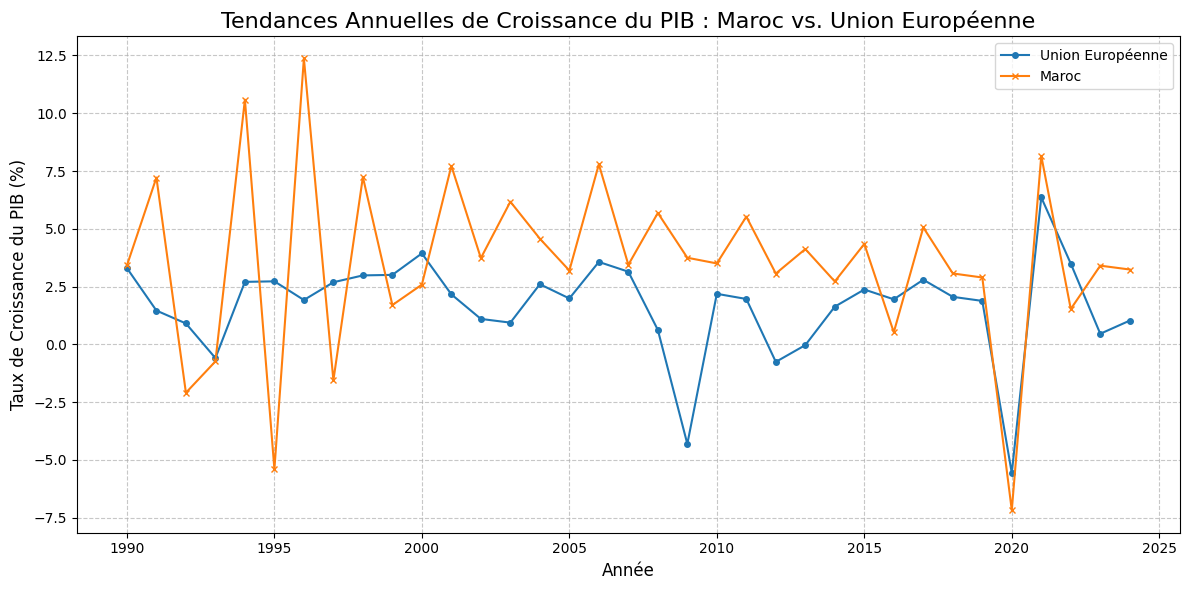

In [8]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
plt.figure(figsize=(12, 6))

# Plot the 'European Union' GDP growth
plt.plot(df_gdp_loaded.index, df_gdp_loaded['European Union'], label='Union Européenne', marker='o', markersize=4)

# Plot the 'Morocco' GDP growth
plt.plot(df_gdp_loaded.index, df_gdp_loaded['Morocco'], label='Maroc', marker='x', markersize=4)

# Add title and labels
plt.title('Tendances Annuelles de Croissance du PIB : Maroc vs. Union Européenne', fontsize=16)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Taux de Croissance du PIB (%)', fontsize=12)

# Add a legend
plt.legend(fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


### Correlation Matrix:

                European Union   Morocco
European Union        1.000000  0.390047
Morocco               0.390047  1.000000


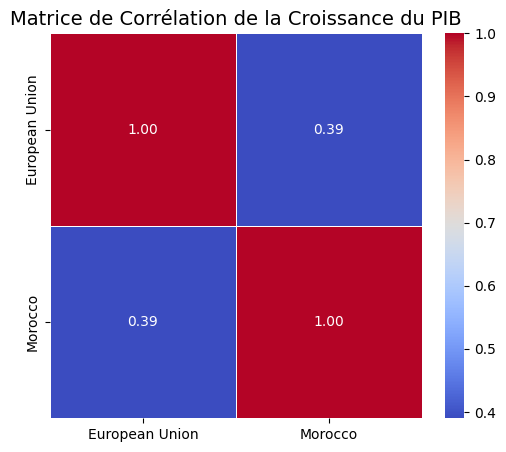

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the correlation matrix
correlation_matrix = df_gdp_loaded.corr()

print("### Correlation Matrix:\n")
print(correlation_matrix)

# 3. Create a heatmap of the correlation_matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# 5. Add a title to the heatmap
plt.title('Matrice de Corrélation de la Croissance du PIB', fontsize=14)

# 6. Display the plot
plt.show()


### Linear Regression Results:

Intercept: 2.39
Coefficient (European Union GDP growth): 0.71
R-squared: 0.15


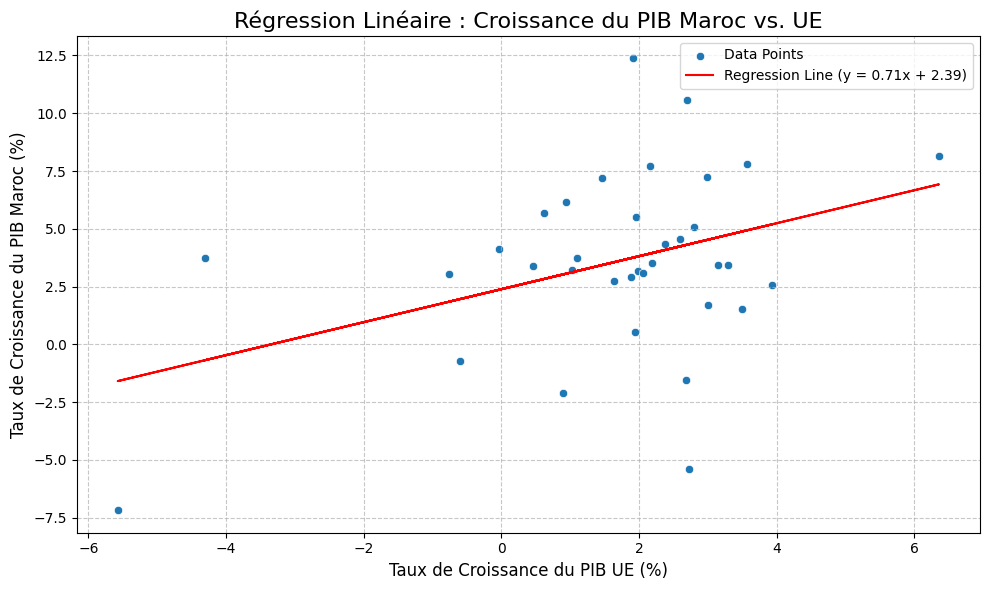

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
# Independent variable (X): European Union GDP growth
X = df_gdp_loaded[['European Union']].values
# Dependent variable (y): Morocco GDP growth
y = df_gdp_loaded['Morocco'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the coefficients and intercept
intercept = model.intercept_
coefficient = model.coef_[0]

# Predict y values based on the fitted model
y_pred = model.predict(X)

# Calculate R-squared value
r_squared = model.score(X, y)

print(f"### Linear Regression Results:\n")
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient (European Union GDP growth): {coefficient:.2f}")
print(f"R-squared: {r_squared:.2f}")

# Plotting the scatter plot with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='European Union', y='Morocco', data=df_gdp_loaded, label='Data Points')
plt.plot(X, y_pred, color='red', label=f'Regression Line (y = {coefficient:.2f}x + {intercept:.2f})')

plt.title('Régression Linéaire : Croissance du PIB Maroc vs. UE', fontsize=16)
plt.xlabel('Taux de Croissance du PIB UE (%)', fontsize=12)
plt.ylabel('Taux de Croissance du PIB Maroc (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Extraction des taux de croissance du PIB pour ['MAR', 'EU'] de 1990 à 2025...


/usr/local/lib/python3.12/dist-packages/pandas_datareader/wb.py:592: UserWarning: Non-standard ISO country codes: EU
  warnings.warn(
/tmp/ipython-input-3418365249.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_gdp = wb.WorldBankReader(symbols=indicator_code, countries=countries, start=start_year, end=end_year).read()



✅ Données téléchargées avec succès.
✅ Données PIB téléchargées et préparées.


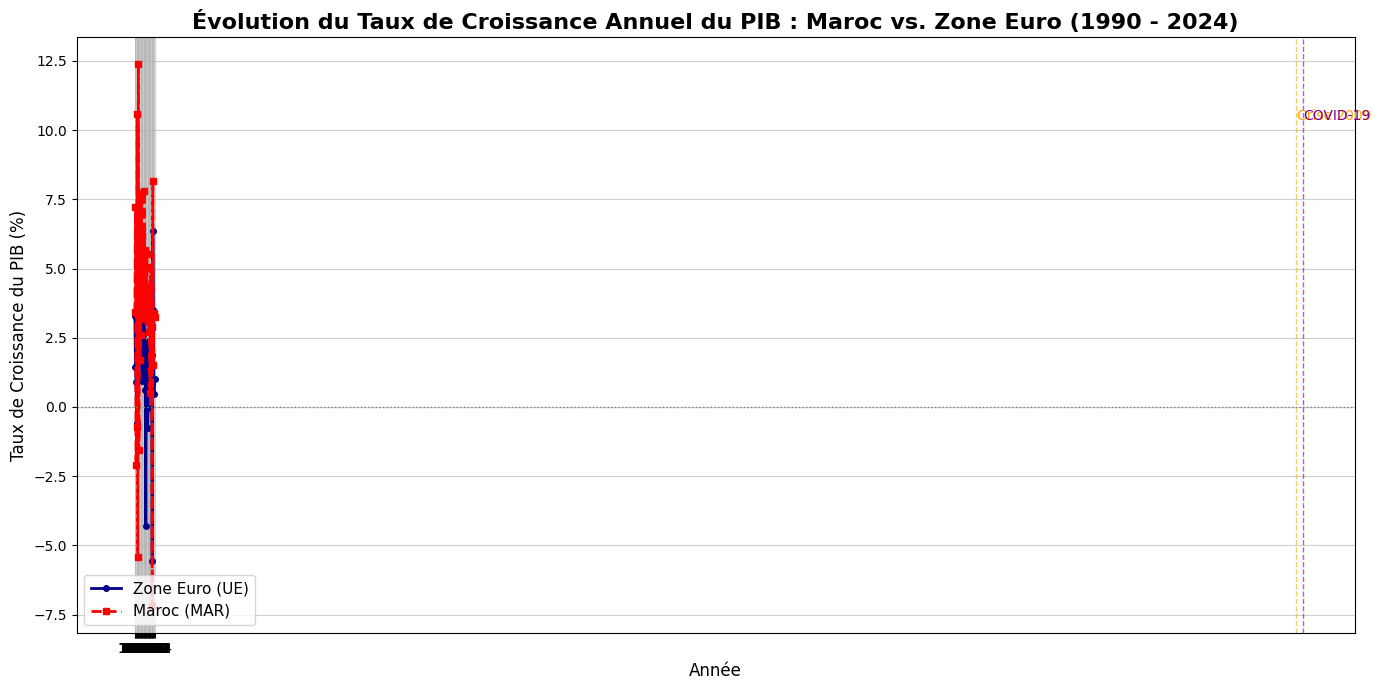


🖼️ Le graphique comparatif du PIB a été affiché. Analysez les périodes de divergence et de convergence !


In [2]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

# --- 1. Paramètres d'Extraction ---
indicator_code = 'NY.GDP.MKTP.KD.ZG'
countries = ['MAR', 'EU']
start_year = 1990
end_year = datetime.date.today().year

print(f"Extraction des taux de croissance du PIB pour {countries} de {start_year} à {end_year}...")

# --- 3. Extraction des données (via l'API de la Banque Mondiale) ---
try:
    # Utilisation du WorldBankReader direct de pandas_datareader.wb
    from pandas_datareader import wb
    df_gdp = wb.WorldBankReader(symbols=indicator_code, countries=countries, start=start_year, end=end_year).read()

    print("\n✅ Données téléchargées avec succès.")

    # Nettoyage et préparation du DataFrame
    # df_gdp initially has a MultiIndex (country, year) and a single column named by indicator_code

    # 1. Reset the index to turn 'country' and 'year' into regular columns
    df_gdp = df_gdp.reset_index()

    # 2. Pivot the DataFrame to have 'year' as index, 'country' codes as columns, and indicator values
    df_gdp_pivoted = df_gdp.pivot(index='year', columns='country', values=indicator_code)

    # 3. Clean up column names
    df_gdp_pivoted.columns.name = None # Remove the 'country' name from the columns index

    # Rename columns to desired French names, ensuring correct mapping
    new_column_names = {
        'Morocco': 'Taux_Croissance_PIB_Maroc',
        'European Union': 'Taux_Croissance_PIB_UE'
    }
    df_gdp = df_gdp_pivoted.rename(columns=new_column_names)

    # Reorder columns explicitly based on the desired output if needed
    # df_gdp = df_gdp[['Taux_Croissance_PIB_Maroc', 'Taux_Croissance_PIB_UE']]

    # 4. Set 'Année' as the index name
    df_gdp.index.name = 'Année'

    # Drop rows with any NaN values that might remain (e.g., if some years are missing for a country)
    df_gdp = df_gdp.dropna()

    print("✅ Données PIB téléchargées et préparées.")

except Exception as e:
    print(f"\n❌ Erreur : Impossible de télécharger les données. Vérifiez votre connexion ou l'installation de 'pandas_datareader'. Détail : {e}")
    # En cas d'échec, on arrête le programme.
    exit()

# --- 3. Création et Personnalisation du Graphique ---

plt.figure(figsize=(14, 7)) # Définition de la taille du graphique

# Tracer la série de la Zone Euro
plt.plot(
    df_gdp.index,
    df_gdp['Taux_Croissance_PIB_UE'],
    label='Zone Euro (UE)',
    marker='o',
    linestyle='-',
    color='darkblue',
    linewidth=2,
    markersize=4
)

# Tracer la série du Maroc
plt.plot(
    df_gdp.index,
    df_gdp['Taux_Croissance_PIB_Maroc'],
    label='Maroc (MAR)',
    marker='s',
    linestyle='--',
    color='red',
    linewidth=2,
    markersize=4
)

# --- 4. Ajout des Éléments Académiques (Annotations) ---

# Titre et Axes
plt.title(
    "Évolution du Taux de Croissance Annuel du PIB : Maroc vs. Zone Euro (1990 - " + str(df_gdp.index.max()) + ")",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Taux de Croissance du PIB (%)", fontsize=12)

# Ligne de référence (Croissance Zéro)
plt.axhline(0, color='grey', linestyle=':', linewidth=1)

# Mise en évidence des Chocs (Annotations)
# Crise Financière (2009)
plt.axvline(2009, color='orange', linestyle='--', linewidth=1, alpha=0.6)
plt.text(2009.5, df_gdp.max().max() - 2, 'Crise 2009', rotation=0, color='orange')

# Choc COVID-19 (2020)
plt.axvline(2020, color='purple', linestyle='--', linewidth=1, alpha=0.6)
plt.text(2020.5, df_gdp.max().max() - 2, 'COVID-19', rotation=0, color='purple')

# Légende et Grille
plt.legend(loc='lower left', fontsize=11)
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout() # Ajustement automatique

# Afficher le graphique
plt.show()

print("\n🖼️ Le graphique comparatif du PIB a été affiché. Analysez les périodes de divergence et de convergence !")